In [1]:
# https://towardsdatascience.com/convolutional-neural-networks-understanding-and-organizing-your-data-set-ba3e8b4086cb
# https://datagy.io/python-decorators/

import pandas
import pathlib
import re
import os
# from tensorflow.keras.models import Sequential, load_module
# from tensorflow.keras.layers import Conv1D
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
import tensorflow as tf
# print(tf.__version__)
# exit()
import random
import numpy as np
import pandas as pd
# import plotly.graph_objects as go
import datetime
from matplotlib import pyplot as plt
from contextlib import redirect_stdout
# import keras
# https://stackoverflow.com/questions/53066762/understanding-1d-convolution-of-dna-sequences-encoded-as-a-one-hot-vector
# https://stackoverflow.com/questions/53514495/what-does-batch-repeat-and-shuffle-do-with-tensorflow-dataset
# https://stackoverflow.com/questions/53066762/understanding-1d-convolution-of-dna-sequences-encoded-as-a-one-hot-vector

cwd = pathlib.Path.cwd()

image_dir = cwd / "FractalImageEvI"
# image_dir = cwd / "FractalImageCvIvU"

batch_size = 200
epochs = 100

pngs = 0
for folder in os.listdir(image_dir):
    for file in os.listdir(image_dir / folder):
        if file.endswith("png"):
            pngs += 1


In [62]:

train_set = tf.keras.preprocessing.image_dataset_from_directory(str(image_dir), image_size = (64, 64), seed = 20170520, subset = "training", validation_split=0.2, batch_size = batch_size, label_mode = "categorical", color_mode="rgba")
valid_set = tf.keras.preprocessing.image_dataset_from_directory(str(image_dir), image_size = (64, 64), seed = 20170520, subset = "validation", validation_split=0.2, batch_size = batch_size, label_mode = "categorical", color_mode="rgba")

steps_per_epoch = int(pngs / batch_size) + 1
print(steps_per_epoch)


Found 39524 files belonging to 2 classes.
Using 31620 files for training.
Found 39524 files belonging to 2 classes.
Using 7904 files for validation.
198


In [65]:
# print(train_set)


input_layer = tf.keras.Input(shape = (64, 64, 4))
x = tf.keras.layers.Conv2D(64, (1, 1), activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(l = 0.01))(input_layer)
x = tf.keras.layers.Flatten()(x)
output_layer = tf.keras.layers.Dense(2, activation = "softmax")(x)

model = tf.keras.Model(inputs = input_layer, outputs = output_layer)

model.compile(optimizer = 'adam',
            loss = 'categorical_crossentropy',
            #   metrics = ['accuracy'])
            metrics = [tf.keras.metrics.CategoricalAccuracy()])

model.summary()

# steps_per_epoch = int(data_size / batch_size) + 1
try:
    history = model.fit(train_set, 
                        batch_size = batch_size, 
                        epochs = epochs,
                        # steps_per_epoch = steps_per_epoch,
                        validation_data = valid_set)
except Exception as E:
    print("I really hate every decision since 2020")
    print(type(E))
    print(E)


Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_26 (InputLayer)       [(None, 64, 64, 4)]       0         
                                                                 
 conv2d_25 (Conv2D)          (None, 64, 64, 64)        320       
                                                                 
 flatten_22 (Flatten)        (None, 262144)            0         
                                                                 
 dense_22 (Dense)            (None, 2)                 524290    
                                                                 
Total params: 524,610
Trainable params: 524,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
159/159 [==============================] - 66s 407ms/step - loss: 658.4482 - categorical_accuracy: 0.7148 - val_loss: 248.8455 - val_categorical_accuracy: 0.5340
Epoch 2/10

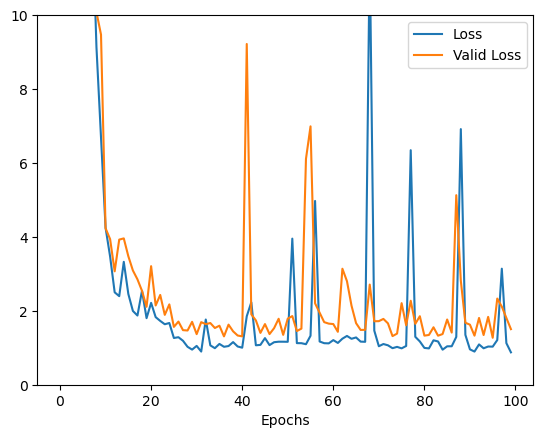

In [66]:
history_data = history.history


plt.plot(history_data["loss"])
plt.plot(history_data["val_loss"])
plt.xlabel("Epochs")
plt.legend(["Loss", "Valid Loss"])
plt.ylim(top = 10, bottom = 0)
plt.show()

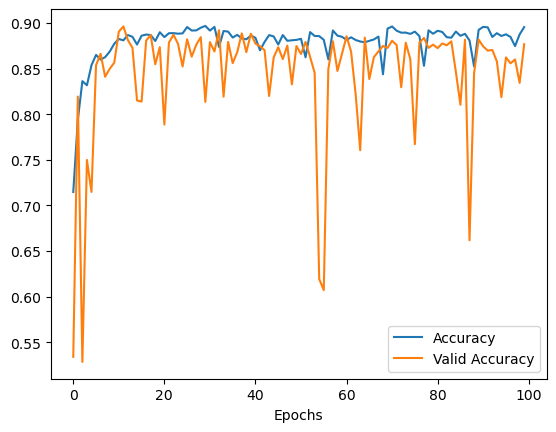

In [67]:
plt.plot(history_data["categorical_accuracy"])
plt.plot(history_data["val_categorical_accuracy"])
plt.xlabel("Epochs")
plt.legend(["Accuracy", "Valid Accuracy"])
plt.show()

In [3]:
image_dir = cwd / "FractalImageEvI"
model_dir = cwd / "FractalModels" / "IvE"
version_num = len(next(os.walk(model_dir))[1])

print(version_num)

1


In [33]:
# euc = lambda x1, x2: ((x1[0] - x2[0])**2) + ((x1[1] - x2[1])**2)

# R = np.array([[1., 2., 3., 4., 5.], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]])
# x = np.transpose(np.where(R > 0))

# L, W = R.shape
# S = int(np.sqrt(L**2 + W**2)) + 1
# # print(l, w, size)
# l, w = x.shape
# print(l, w)

# D = np.zeros(shape=(l, l))

# l = len(x)
# for k in range(l):
#     step = 1 + k
#     for i in range(0, l - k - 1):
#         d = euc(x[i], x[i + step])

#         D[i, i + step] = d
#         D[i + step, i] = d

#     # print(f"\n")

# print(R)
# print(D)
    


5 2
[[1. 2. 3. 4. 5.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[ 0.  1.  4.  9. 16.]
 [ 1.  0.  1.  4.  9.]
 [ 4.  1.  0.  1.  4.]
 [ 9.  4.  1.  0.  1.]
 [16.  9.  4.  1.  0.]]
